In [222]:
import tensorflow as tf
import numpy as np
import cv2
img_path = "test_images/sample_5_orig.jpg"
img = cv2.imread(img_path)
image_size = 512 # 512x512
img = cv2.resize(img, (image_size, image_size))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_size = img.shape[0] # 512x512
img_array = np.expand_dims(img,axis=0).astype(np.float32)
# Predict
predictions = tf.squeeze(new_model.predict(img_array))

1/1 [==============================] - 0s 120ms/step


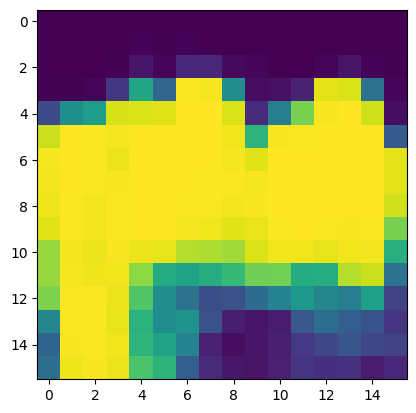

In [223]:
# Display
import  matplotlib.pyplot as plt
plt.imshow(predictions)

In [224]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
grid_size = predictions.shape[0]
pix_per_grid = int(image_size/(grid_size))
resolution_factor = 0.1
old_dim = pix_per_grid
new_dim = int(resolution_factor*old_dim)
threshold = 0.5
blur_indices = np.argwhere(predictions < threshold)
for i in blur_indices:
    row = pix_per_grid*i[0]
    col = pix_per_grid*i[1]
    crop = img[row: row + pix_per_grid, col:col + pix_per_grid]
    crop = cv2.resize(crop, (new_dim, new_dim))
    crop = cv2.resize(crop, (old_dim, old_dim))
    img[row: row + pix_per_grid, col: col + pix_per_grid] = crop

In [225]:
old_dim, new_dim

(32, 3)

In [226]:
cv2.imshow("image", img)
cv2.waitKey()

-1

In [227]:
cv2.imwrite('patchwise.png', img)

True